In [8]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# ***READING THE DATASET***

In [9]:
df = pd.read_csv("bodyfat.csv")
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


# ***EXPLORATORY DATA ANALYSIS***

count    252.000000
mean      19.150794
std        8.368740
min        0.000000
25%       12.475000
50%       19.200000
75%       25.300000
max       47.500000
Name: BodyFat, dtype: float64


<Axes: xlabel='BodyFat', ylabel='Count'>

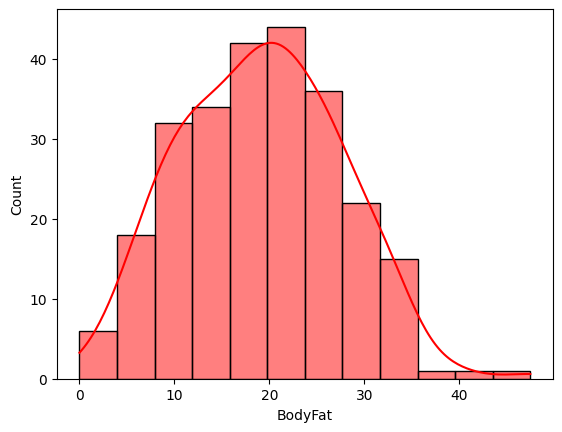

In [21]:
# Distribution of the body fat

print(df['BodyFat'].describe())
sns.histplot(data=df, x=df["BodyFat"], kde=True, color='r')

array([[<Axes: title={'center': 'Density'}>,
        <Axes: title={'center': 'BodyFat'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Neck'}>,
        <Axes: title={'center': 'Chest'}>,
        <Axes: title={'center': 'Abdomen'}>],
       [<Axes: title={'center': 'Hip'}>,
        <Axes: title={'center': 'Thigh'}>,
        <Axes: title={'center': 'Knee'}>,
        <Axes: title={'center': 'Ankle'}>],
       [<Axes: title={'center': 'Biceps'}>,
        <Axes: title={'center': 'Forearm'}>,
        <Axes: title={'center': 'Wrist'}>, <Axes: >]], dtype=object)

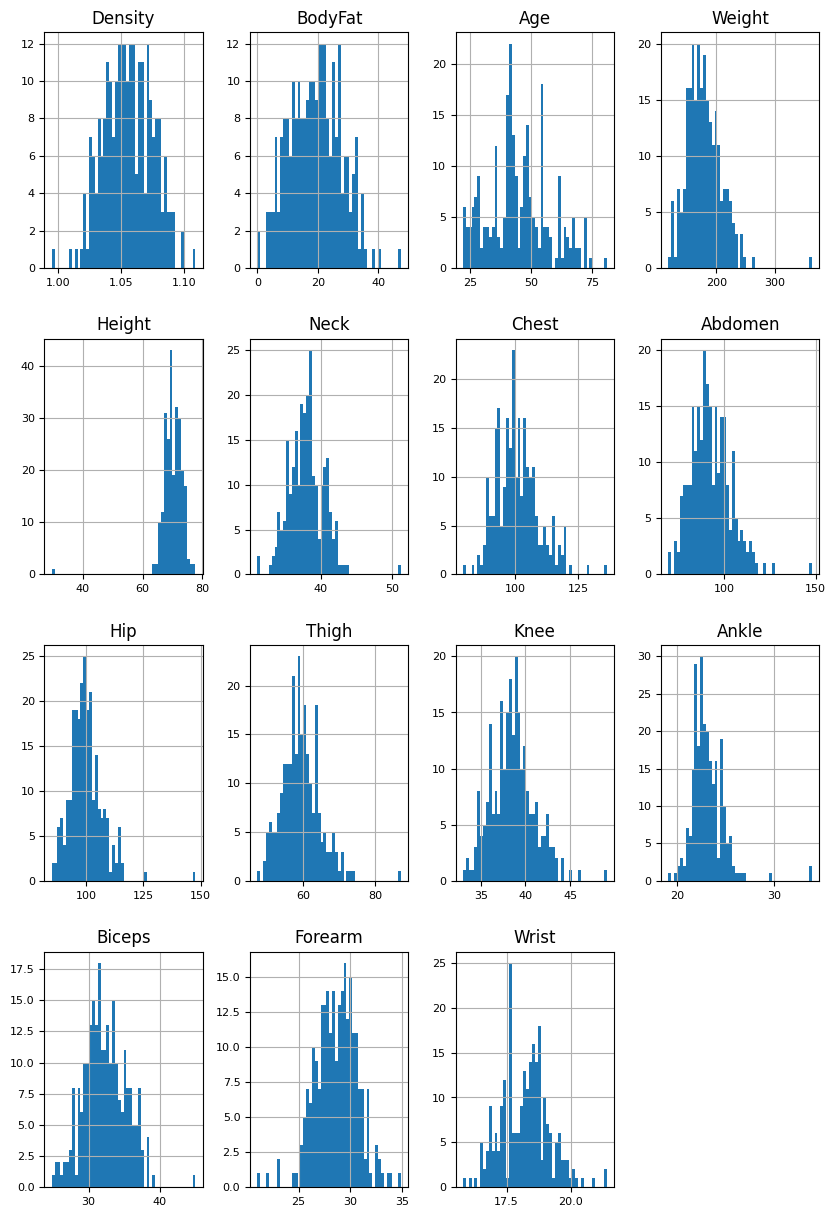

In [25]:
# Distribution of the features

df.hist(figsize=(10, 15), bins=50, xlabelsize=8, ylabelsize=8)

In [40]:
# Finding correlation between Body fat and the features in the dataset

df_corr = df.corr()['BodyFat']
del df_corr["BodyFat"]
good_features = df_corr[df_corr > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with BodyFat:\n{}".format(len(good_features), good_features))

There is 6 strongly correlated values with BodyFat:
Abdomen    0.813432
Chest      0.702620
Hip        0.625201
Weight     0.612414
Thigh      0.559608
Knee       0.508665
Name: BodyFat, dtype: float64


In [41]:
columns = list(df.columns)   # list of columns in the original dataset

In [43]:
# Plot the numerical features and see which ones have very few or explainable outliers 
# Remove the outliers from these features and see which one can have a good correlation without their outliers

for i in range(0, len(columns)):
    sns.pairplot(data=df,
                x_vars=columns[:],
                y_vars=['BodyFat'])

/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
 

# ***DATA PREPPROCESSING***

In [12]:
print("Total null values at each column: \n", df.isnull().sum())

Total null values at each column: 
 Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64


In [13]:
# df['NumZeros'] = (df == 0).sum(axis=1)
# print(df)
# print(sum(df['NumZeros']))

In [14]:
# df["Bodyfat_indexed"] = np.where(df["Age"] <= 39,
#                                   np.where(df["BodyFat"] > 25, 1, 0),
#                                   np.where(df["BodyFat"] > 28, 1, 0))